In [22]:

##########################################################
#  Python script template for Question 2 (IAML Level 10)
#  Note that
#  - You should not change the name of this file, 'iaml01cw2_q2.py', which is the file name you should use when you submit your code for this question.
#  - You should write code for the functions defined below. Do not change their names.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define additional functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission.
##########################################################

#--- Code for loading modules and the data set and pre-processing --->
# NB: You can edit the following and add code (e.g. code for loading sklearn) if necessary.

import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from iaml01cw2_helpers import *
# from iaml01cw2_my_helpers import *

#<----

In [2]:
# Repeat steps to retrieve data
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("../data")
   
# STEP 1: Make copies of original X data
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()
   
# STEP 2: Divide each elemnt of Xtrn and Xtst
Xtrn = np.divide(Xtrn, 255.0)
Xtst = np.divide(Xtst, 255.0)
 
# STEP 3: Find mean of each col in Xtrn
Xmean = np.mean(Xtrn, axis=0)
  
# STEP 4: Subtract mean from each from of Xtrn and Xtst
Xtrn_nm = np.subtract(Xtrn, Xmean)
Xtst_nm = np.subtract(Xtst, Xmean)

In [3]:
# Q2.1
def iaml01cw2_q2_1():
    # Use pickle to avoid training every time  
    
    #---------------------(COMMENT OUT WHEN COMPLETED ONCE!)---------------------#
    # Classification experiment with multinomial logistic regression
    model_2_1 = LogisticRegression().fit(Xtrn_nm, Ytrn) # Uncomment to retrain
    # Save the model to disk 
    pickle.dump(model_2_1, open('model_2_1.sav', 'wb')) # Uncomment to resave
    #----------------------------------------------------------------------------#
    
    # Load the model from disk
    model_2_1 = pickle.load(open('model_2_1.sav', 'rb'))
    
    # Accuracy score and confusion matrix
    acc_score = model_2_1.score(Xtst_nm, Ytst)
    Ypred = model_2_1.predict(Xtst_nm)
    cm = confusion_matrix(Ytst, Ypred)
    
    print(acc_score)
    print(cm)
    
    return model_2_1

iaml01cw2_q2_1()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
# Q2.2
def iaml01cw2_q2_2():    
    # Use pickle to avoid training every time
    
    #---------------------(COMMENT OUT WHEN COMPLETED ONCE!)---------------------#
    # Classification experiment with multinomial logistic regression
    model_2_2 = SVC().fit(Xtrn_nm, Ytrn) # Uncomment to retrain
    # Save the model to disk 
    pickle.dump(model_2_2, open('model_2_2.sav', 'wb')) # Uncomment to resave
    #----------------------------------------------------------------------------#
    
    # Load the model from disk
    model_2_2 = pickle.load(open('model_2_2.sav', 'rb'))
    
    # Accuracy score and confusion matrix
    acc_score = model_2_2.score(Xtst_nm, Ytst)
    Ypred = model_2_2.predict(Xtst_nm)
    cm = confusion_matrix(Ytst, Ypred)
    
    print(acc_score)
    print(cm)
    
    return model_2_2
    
iaml01cw2_q2_2()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

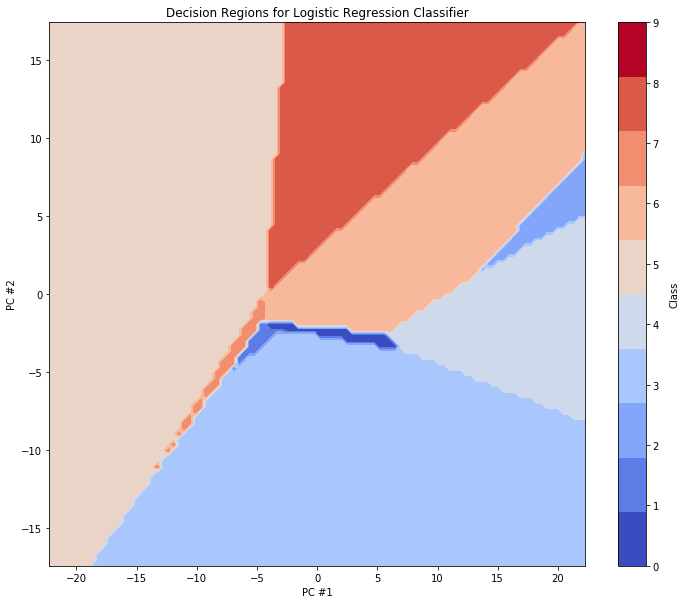

In [31]:
# Q2.3
def iaml01cw2_q2_3():
    # Get all vars 2.1
    model_2_1 = iaml01cw2_q2_1()
    
    # Get first 2 principal components
    pca = PCA(n_components=2)
    Xtrn_nm_trans = pca.fit_transform(Xtrn_nm)
    
    # Plot
    plt.figure(figsize=(12,10))
    plt.title("Decision Regions for Logistic Regression Classifier")
    
    x_min, x_max = np.multiply(-5, np.std(Xtrn_nm_trans[:,0])), np.multiply(5, np.std(Xtrn_nm_trans[:,0]))
    y_min, y_max = np.multiply(-5, np.std(Xtrn_nm_trans[:,1])), np.multiply(5, np.std(Xtrn_nm_trans[:,1]))
    
    
    x_range = np.linspace(x_min, x_max, 100)
    y_range = np.linspace(y_min, y_max, 100)  
    
    V = []
    
    for y in y_range:
        for x in x_range:
            V.append([x,y]) 
    
    z = pca.inverse_transform(V)
    z = model_2_1.predict(z)
    z = z.reshape(100,100)
    
    colours = plt.cm.get_cmap("coolwarm", 10)
    levels = np.linspace(0, 9, 11) # n+1 where n=10 classes
    plt.contourf(x_range, y_range, z, cmap=colours, levels=levels)
    plt.xlabel("PC #1")
    plt.ylabel("PC #2")
    plt.colorbar(spacing='uniform', ticks=np.arange(11), boundaries=np.arange(11)).set_label("Class", rotation=90, labelpad=10)
    plt.show()  

iaml01cw2_q2_3()

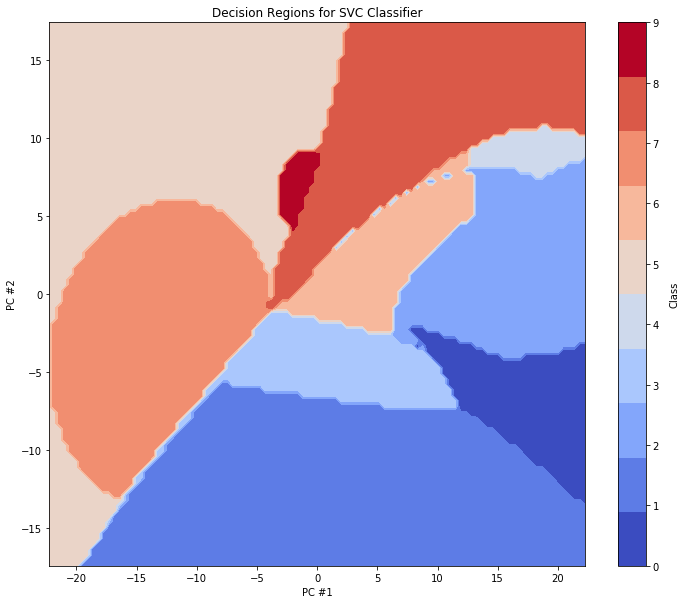

In [32]:
# Q2.4
def iaml01cw2_q2_4():
    # Get all vars from Q2.2
    model_2_2 = iaml01cw2_q2_2()
    
    # Get first 2 principal components
    pca = PCA(n_components=2)
    Xtrn_nm_trans = pca.fit_transform(Xtrn_nm)
    
    # Plot
    plt.figure(figsize=(12,10))
    plt.title("Decision Regions for SVC Classifier")
    
    x_min, x_max = np.multiply(-5, np.std(Xtrn_nm_trans[:,0])), np.multiply(5, np.std(Xtrn_nm_trans[:,0]))
    y_min, y_max = np.multiply(-5, np.std(Xtrn_nm_trans[:,1])), np.multiply(5, np.std(Xtrn_nm_trans[:,1]))    
    
    x_range = np.linspace(x_min, x_max, 100)
    y_range = np.linspace(y_min, y_max, 100)  
    
    V = []
    
    for y in y_range:
        for x in x_range:
            V.append([x,y]) 
    
    z = pca.inverse_transform(V)
    z = model_2_2.predict(z)
    z = z.reshape(100,100)
    
    colours = plt.cm.get_cmap("coolwarm", 10)
    levels = np.linspace(0, 9, 11) # n+1 where n=10 classes
    plt.contourf(x_range, y_range, z, cmap=colours, levels=levels)
    plt.xlabel("PC #1")
    plt.ylabel("PC #2")
    plt.colorbar(spacing='uniform', ticks=np.arange(11), boundaries=np.arange(11)).set_label("Class", rotation=90, labelpad=10)
    plt.show()  

iaml01cw2_q2_4()

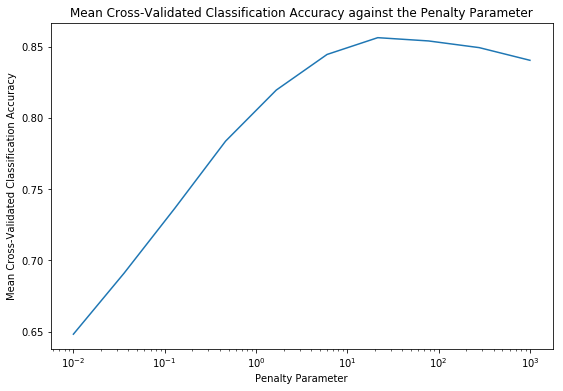

0.8565023106939273 21.544346900318846
[0.6481958005910101, 0.6910976845108582, 0.7367022711334088, 0.783804163444882, 0.8197017376658096, 0.8447012881144618, 0.8565023106939273, 0.8542039045033057, 0.8495030959102815, 0.8406013798229367]


21.544346900318846

In [9]:
# Q2.5
def iaml01cw2_q2_5():
    Xsmall = np.zeros((10,1000,784))
    Ysmall = np.zeros((10,1000))
    
    for i in range(10):
        Xsmall[i] = Xtrn_nm[Ytrn==i][:1000]
        Ysmall[i] = i

    Xsmall = Xsmall.reshape(10000,784)
    Ysmall = Ysmall.reshape(10000)

    Cs = np.logspace(-2,3,10)
    scores = []
    
    for c in Cs:
        # Classification experiment with multinomial logistic regression
        model_2_5 = SVC(C=c) # Gamma and RBF by default
        scores.append(cross_val_score(model_2_5, Xsmall, Ysmall, n_jobs=-1, cv=3).mean())

    # Plot
    plt.figure(figsize=(9,6))
    plt.title("Mean Cross-Validated Classification Accuracy against the Penalty Parameter")
    plt.plot(Cs,scores)
    plt.xscale("log")
    plt.xlabel("Penalty Parameter")
    plt.ylabel("Mean Cross-Validated Classification Accuracy")
    plt.show()
    
    # Find best score and it's C value
    best_score = max(scores)
    best_c = Cs[np.argmax(scores)]
    
    print(best_score, best_c)
    print(scores)  
    
    return best_c
    
iaml01cw2_q2_5()

In [4]:
# Q2.6
def iaml01cw2_q2_6():
    # Get all vars from Q2.5
    best_c = iaml01cw2_q2_5()
    # best_c = 21.544346900318846 # for quickeness when testing
    
    # Use pickle to avoid training every time  
    
    #---------------------(COMMENT OUT WHEN COMPLETED ONCE!)---------------------#
    # Classification experiment with multinomial logistic regression
    model_2_6 = SVC(C=best_c).fit(Xtrn_nm, Ytrn) # Uncomment to retrain
    # Save the model to disk 
    pickle.dump(model_2_6, open('model_2_6.sav', 'wb')) # Uncomment to resave
    #----------------------------------------------------------------------------#
    
    # Load the model from disk
    model_2_6 = pickle.load(open('model_2_6.sav', 'rb'))
    
    # Accuracy score
    acc_score_trn = model_2_6.score(Xtrn_nm, Ytrn)
    acc_score_tst = model_2_6.score(Xtst_nm, Ytst)
    
    print("Train score:", acc_score_trn)
    print("Test score:", acc_score_tst)
      
iaml01cw2_q2_6()

Train score: 0.9084166666666667
Test score: 0.8765
